## Experiments 

In [1]:
!pip install blobfile

In [ ]:
nohup python $1 > output.txt < /dev/null &

In [1]:
import torch 

torch.cuda.is_available()

True

In [1]:
import numpy as np

data = np.load('../Samples_CIFAR/samples_128x64x64x3.npz')
batches = data[data.files[0]]

In [2]:
# First batch (why 64???)
batches.shape

(128, 64, 64, 3)

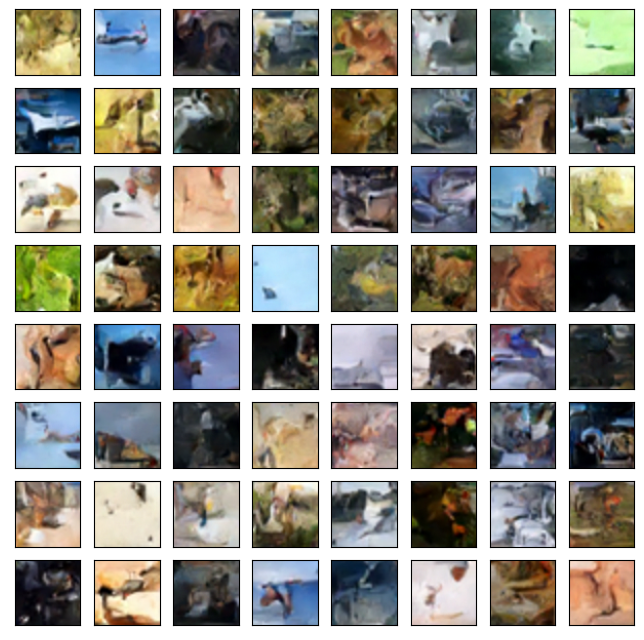

In [21]:
import matplotlib.pyplot as plt

start = 64
plt.figure(figsize=(8,8))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(batches[i+start,:,:])
    plt.xticks([])
    plt.yticks([])
plt.savefig(fname="FirstSample")
plt.show()

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

cifar_training = pd.read_csv("../Checkpoint_CIFAR/progress.csv")

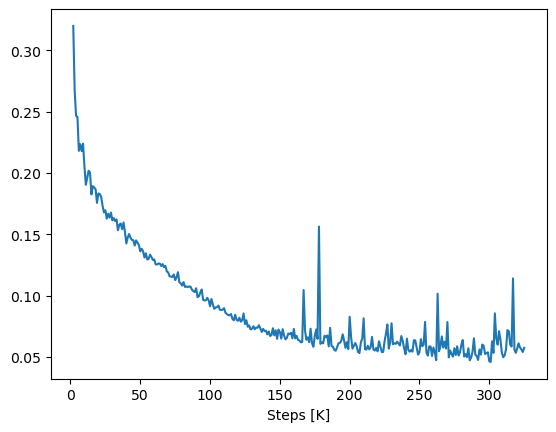

In [20]:
plt.plot(cifar_training.grad_norm[2:])
plt.xlabel("Steps [K]")
plt.show()

,grad_norm,loss,loss_q0,mse,mse_q0,samples,step,loss_q1,loss_q2,loss_q3,mse_q1,mse_q2,mse_q3
0,1.992775,0.995658,0.995658,0.995658,0.995658,1,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.657206,0.072430,0.143044,0.072430,0.143044,1001,1000,0.047147,0.038997,0.059138,0.047147,0.038997,0.059138
2,0.320047,0.023428,0.070981,0.023428,0.070981,2001,2000,0.014724,0.004683,0.002810,0.014724,0.004683,0.002810
3,0.267328,0.021399,0.067980,0.021399,0.067980,3001,3000,0.013244,0.003870,0.001984,0.013244,0.003870,0.001984
4,0.246707,0.018919,0.055220,0.018919,0.055220,4001,4000,0.012855,0.003583,0.001604,0.012855,0.003583,0.001604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0.061094,0.013452,0.040135,0.013452,0.040135,321001,321000,0.009963,0.002191,0.000392,0.009963,0.002191,0.000392
322,0.057767,0.014815,0.042167,0.014815,0.042167,322001,322000,0.009524,0.002332,0.000380,0.009524,0.002332,0.000380
323,0.056123,0.014053,0.042567,0.014053,0.042567,323001,323000,0.009204,0.002330,0.000385,0.009204,0.002330,0.000385
324,0.054024,0.013246,0.039657,0.013246,0.039657,324001,324000,0.009149,0.002399,0.000368,0.009149,0.002399,0.000368


### Plot first samples from T1CE

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('../Samples_T1CE/samples_40x256x256x3.npz')
batches = data[data.files[0]]

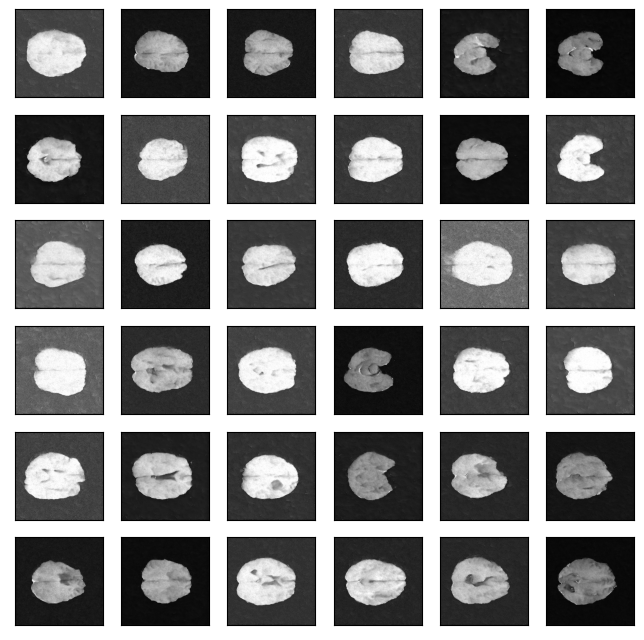

In [3]:
start=4
plt.figure(figsize=(8,8))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(batches[i+start,:,:,1], cmap="gray")
    plt.xticks([])
    plt.yticks([])
plt.savefig(fname="FirstSample")
plt.show()

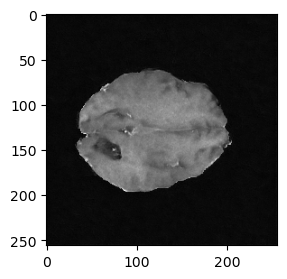

In [4]:
i = 39
plt.figure(figsize=(3,3))
plt.imshow(batches[i,:,:,1], cmap="gray")

## Experiment with dataloader

In [10]:
from image_datasets import load_data

loader = load_data(data_dir="../brats2020_313subjects_noaugmentation_singlesegmentationchannel_min15percentcoverage/T1CE", 
    batch_size=4,
    image_size=256,
    grayscale=True)

In [11]:
example = next(loader)
example = example[0] # Second dimension empt due to not class cond
example.shape # We get (3,256,256) tensor so RGB even though it is one channel

ValueError: Caught ValueError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/local/data1/pathi619/MyCondaInstall/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "/local/data1/pathi619/MyCondaInstall/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 58, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/local/data1/pathi619/MyCondaInstall/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 58, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/local/data1/pathi619/Diffusion-Model-BRATS/notebooks/image_datasets.py", line 111, in __getitem__
    return np.transpose(arr, [2, 0, 1]), out_dict
  File "<__array_function__ internals>", line 180, in transpose
  File "/local/data1/pathi619/MyCondaInstall/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 660, in transpose
    return _wrapfunc(a, 'transpose', axes)
  File "/local/data1/pathi619/MyCondaInstall/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 57, in _wrapfunc
    return bound(*args, **kwds)
ValueError: axes don't match array


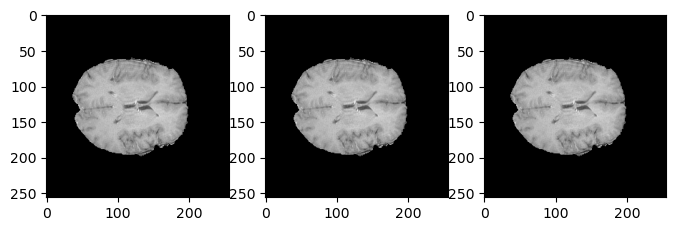

In [9]:
first = example[0,:,:,:]
plt.figure(figsize=(8,3))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(first[i,:,:], cmap="gray")
plt.show()

In [56]:
# It loads the same picture in each dimension
print((first[0,:,:]==first[0,:,:]).sum())
print(256*256)

tensor(65536)
65536


In [57]:
from PIL import Image
import blobfile as bf

# Which normalization used? What is going on to map it to RGB?
path = "../brats2020_313subjects_noaugmentation_singlesegmentationchannel_min15percentcoverage/T1CE/Subject_001_slice_53_T1ce.png"
with bf.BlobFile(path, "rb") as f:
            pil_image = Image.open(f)
            pil_image.load()

In [61]:
arr = np.array(pil_image.convert("RGB"))
arr.shape

(256, 256, 3)

In [64]:
from PIL import ImageOps
np.array(pil_image).shape

(256, 256)

In [3]:
from image_datasets import load_data

loader = load_data(data_dir="../TestIdx", 
    batch_size=4,
    image_size=256,
    grayscale=True)

In [72]:
# Why is it looping forever?
next(loader).shape

AttributeError: 'list' object has no attribute 'shape'

In [36]:
import blobfile as bf
from PIL import Image
import numpy as np
from torch.utils.data import Dataset, DataLoader

class ImageDataset(Dataset): 
    def __init__(self, resolution, image_paths, classes=None, shard=0, num_shards=1, grayscale=False):
        super().__init__()
        self.resolution = resolution
        self.local_images = image_paths[shard:][::num_shards]
        self.local_classes = None if classes is None else classes[shard:][::num_shards]
        self.grayscale = grayscale

    def __len__(self):
        return len(self.local_images)

    def __getitem__(self, idx):
        path = self.local_images[idx]
        with bf.BlobFile(path, "rb") as f:
            pil_image = Image.open(f)
            pil_image.load()

        # We are not on a new enough PIL to support the `reducing_gap`
        # argument, which uses BOX downsampling at powers of two first.
        # Thus, we do it by hand to improve downsample quality.
        while min(*pil_image.size) >= 2 * self.resolution:
            pil_image = pil_image.resize(
                tuple(x // 2 for x in pil_image.size), resample=Image.BOX
            )

        scale = self.resolution / min(*pil_image.size)
        pil_image = pil_image.resize(
            tuple(round(x * scale) for x in pil_image.size), resample=Image.BICUBIC
        )

        if self.grayscale:
            arr = np.array(pil_image)
        else:
            arr = np.array(pil_image.convert("RGB"))
        crop_y = (arr.shape[0] - self.resolution) // 2
        crop_x = (arr.shape[1] - self.resolution) // 2
        arr = arr[crop_y : crop_y + self.resolution, crop_x : crop_x + self.resolution]
        arr = arr.astype(np.float32) / 127.5 - 1

        out_dict = {}
        if self.local_classes is not None:
            out_dict["y"] = np.array(self.local_classes[idx], dtype=np.int64)
        return np.transpose(arr, [2, 0, 1]), out_dict

In [37]:
import os 

images = [os.path.join("./TestIdx/", path) for path in os.listdir("./TestIdx/")]
theirDS = ImageDataset(resolution=256, image_paths=images)
theirLoader = DataLoader(theirDS, batch_size = 4, shuffle = True, num_workers = 0)

batch_example = next(iter(theirLoader))


/tmp/ipykernel_2306/3112903245.py:33: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  tuple(round(x * scale) for x in pil_image.size), resample=Image.BICUBIC


In [71]:
from torch.utils.data import DataLoader, Dataset
class MyDataset(Dataset):
    def __init__(self):
        self.bob = [0,1,2]
    def __len__(self):
        return len(self.bob)
    def __getitem__(self, idx):
        print(f'idx = {idx}')
        return self.bob[idx]

dataset = DataLoader(MyDataset(), batch_size = 1, shuffle = True, num_workers = 0)

for i, data in enumerate(dataset):
    print(i)
    print(data)

idx = 2
0
tensor([2])
idx = 1
1
tensor([1])
idx = 0
2
tensor([0])


In [74]:
def get(loader):
    while True:
        yield from loader

genn = get(dataset)

In [107]:
next(genn)

idx = 2


tensor([2])

In [18]:
import torch 
from skimage import io
from torch.utils.data import DataLoader, Dataset


class load_channels_from_dir(Dataset):
    """Load each channel from a different directory."""

    def __init__(self, channel_paths, transform=None, return_class=False):
        super().__init__()
        self.channel_paths = channel_paths # List with lists of full paths for each image-channel
        self.num_channel = len(channel_paths[0]) # Number of channels to include
        self.transform = transform
        self.return_class = return_class

    def __len__(self):
        return len(self.channel_paths)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        # Fetch all channels
        all_chan = [] # Store each channel tensor in list
        for c in range(self.num_channel):
            # Load image channel
            img_path = self.channel_paths[idx][c]
            img = io.imread(img_path) # Size: (256,256)

            # Normalize in PyTorch manner img/127.5 - 1 so range -1,1
            img = img/127.5 - 1
            
            # Transform to tensor and unsqueeze in first dim
            img = torch.Tensor(img)
            
            if len(img.shape)==4:
                img = img.unsqueeze(dim=0) # Remove redundant dimension, depending on Torch version

            all_chan.append(img)

        if len(all_chan)==1:
            # If only one channel, add dummy dimension 
            final_img = all_chan[0][None,:,:]
        else:
            # Create and return tensor of size (Channels, Size, Size) 
            final_img = torch.stack(all_chan)


        #if self.transform:
        #    sample = self.transform(sample)
        if self.return_class:
            return final_img, 0
        else:
            return final_img

In [19]:
import os

root = '../brats2020_313subjects_noaugmentation_singlesegmentationchannel_min15percentcoverage'
channels =  ['FLAIR', 'Seg', 'T1', 'T1CE', 'T2']

channel_paths = [os.path.join(root, channel_dir) for channel_dir in channels]

FLAIR = [os.path.join(channel_paths[0], path) for path in sorted(os.listdir(channel_paths[0])) if path.endswith(".png")]
SEG = [os.path.join(channel_paths[1], path) for path in sorted(os.listdir(channel_paths[1])) if path.endswith(".png")]
T1 = [os.path.join(channel_paths[2], path) for path in sorted(os.listdir(channel_paths[2])) if path.endswith(".png")]
T1CE = [os.path.join(channel_paths[3], path) for path in sorted(os.listdir(channel_paths[3])) if path.endswith(".png")]
T2 = [os.path.join(channel_paths[4], path) for path in sorted(os.listdir(channel_paths[4])) if path.endswith(".png")]

ALL_CHANNELS = list(zip(FLAIR, SEG, T1, T1CE, T2))

In [20]:
import numpy as np
T1CE_channel = np.array(T1CE).reshape(-1,1)

In [22]:
BRATS_DS = load_channels_from_dir(channel_paths=T1CE_channel)
loader = DataLoader(BRATS_DS, batch_size=4, shuffle=True, drop_last=True)

res = next(iter(loader))
res.shape

torch.Size([4, 1, 256, 256])

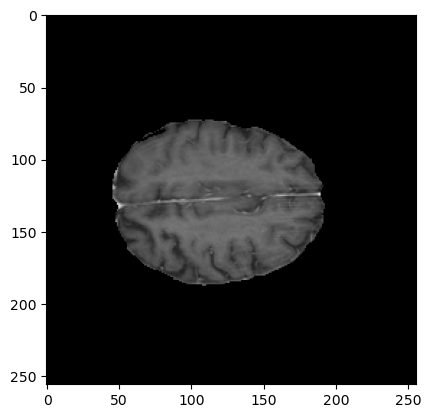

In [73]:
import matplotlib.pyplot as plt

res = next(iter(loader))

plt.imshow(res[0,0,:,:], cmap="gray")

In [69]:
for i, batch in enumerate(loader):
    print(batch.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])
torch.Size([4, 3, 32, 32])


In [174]:
# Yield:
a = get(loader)
for i in range(50):
    next(a)

In [171]:
torch.__version__

'1.13.0'

In [ ]:
# In yield, it runs infinetly (at least for pytroch 1.13 vs 1.10 on Mac where we get StopIteration)

## How often do we go over the dataset?

In [176]:
num ="""19498
13886
17913
52
30327
28902
27648
5898
46798
48976
36512
34375
29876
43859
10430
47526
19526
14886
41099
28484
15401
246
49597
36586
10887
15078
32563
4362
5684
34359
4678
17669
39184
26022
8814
20133
7895
15250
46121
26475
43663
47997
14509
9279
23161
10410
47454
36619
5923
45156
30196
20980
49934
19584
48609
49330
11894
23637
27794
23984
16964
29669
32567
30580
23828
48328
21303
30133
36900
41413
3950
48
17637
157
15500
9070
25994
33183
22553
13885
11694
3631
28527
39826
21861
33221
35704
7558
38303
38061
11845
4764
1812
39090
20672
16681
38693
22027
26662
40235
8608
569
38936
31879
2446
45688
14193
15151
20738
48851
10229
11811
17717
20037
42967
2320
597
15395
18403
41433
43409
11201
36862
46774
45827
31077
49439
12754
19171
43464
16418
40633
49038
48790
37022
35506
28649
25588
24334
33556
28328
26440
49377
2168
39764
2614
12803
45690
42989
46572
9803
9362
18619
32044
16705
44103
13331
33704
21600
17235
26056
24351
12347
14716
28627
22599
9245
14487
33006
4983
14109
35983
41574
13047
9739
44997
46765
18268
28369
28663
34312
40616
28514
27945
44111
9980
44341
41955
25475
34321
25690
20001
45477
2306
31534
47590
3737
1240
34112
9842
25665
9321
8145
12011
19587
46728
1963
42140
22387
44029
12452
5120
16180
32064
49010
27965
11429
36241
36973
18246
11322
14918
36848
16882
44621
29835
40283
47878
49154
43070
14115
27957
48887
4517
27577
7277
11996
48352
32493
40641
10546
4684
37098
16035
12790
33829
11086
12819
46720
37225
46580
17207
47994
37992
6113
37987
42006
554
29632
17212
15295
46479
24147
46116
36227
5961
4703
34007
49665
5317
9238
8843
409
4431
42425
1344
39884
37128
10919
29931
15454
42051
35415
31080
40842
17431
20435
35399
17690
17694
7398
3392
23178
30553
24380
9224
48649
2949
41462
5376
15417
36362
28558
46128
12812
46845
4772
37295
48563
19749
25069
37729
2914
36040
36022
33071
8173
6038
1938
4047"""



In [182]:
print(len(num.split("\n")))
len(os.listdir("../cifar_train/"))

320


50000

In [184]:
# Got it! One STEP per batch!!!! So if we take 10 steps (log interval) on batch size of 32, we will see 320 pictures!
# One epoch on the data: For CIFAR, thats 1563 steps to see all of the pictures once
50000/32

1562.5

In [185]:
# For my example 36 so BS 4 * 10 = 40 
num = """12
10
9
3
4
2
6
0
7
1
11
5
8
1
12
11
7
6
4
3
9
10
2
5
4
10
0
1
3
2
7
11
12
9
8
5"""

In [187]:
len(num.split("\n"))

36

In [ ]:
# But approx correct, for batch_size 1 its 10, for 2 its 18 (but approx correct!!!)